### This is based on a take-home assignment.
### It is a heavy file, so please wait until it fully loads to see the whole analysis.

# Load packages

In [1]:
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from scipy.stats import spearmanr
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance
from scipy.stats import spearmanr
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform
from scipy import stats
from collections import defaultdict

# Exploratory data analysis

In [2]:
# Load and process data
xdata_known = pd.read_csv('Documents/Portfolio/Orchids/data_known.csv') 
xdata_unknown = pd.read_csv('Documents/Portfolio/Orchids/data_unknown.csv')

In [3]:
# Inspect known dataset for information on what kind of data we have
print(xdata_known.shape)
xdata_known.head()

(84, 57)


,Type,leaflets,surface_area,measurement_nr1,measurement_nr2,measurement_nr3,measurement_nr4,measurement_nr5,measurement_nr6,measurement_nr7,...,measurement_nr45,measurement_nr46,measurement_nr47,measurement_nr48,measurement_nr49,measurement_nr50,measurement_nr51,measurement_nr52,measurement_nr53,measurement_nr54
0,Epidendrum,73,2.007654,1965.256359,1087.841507,684.322103,464.713972,336.540346,254.079019,199.027700,...,6.355902,5.943846,5.560784,5.362846,3.304537,2.397241,2.184000,2.028252,2.014167,27156.56810
1,Epidendrum,71,2.011532,3382.397579,1839.552545,1094.504536,708.468677,489.415494,357.769429,273.333782,...,7.978681,7.640661,7.230277,6.790977,3.905151,2.923043,2.381660,2.175812,2.103043,28662.85233
2,Epidendrum,83,2.013272,2144.503555,1119.120626,672.686450,446.678280,317.785637,237.068181,184.184722,...,5.398888,5.198605,4.961954,4.648585,3.011919,2.299807,2.112250,2.037387,2.012500,23884.04427
3,Dendrobium,76,2.010668,2569.934056,1409.861923,878.390121,608.673852,454.793799,358.880382,295.119663,...,20.702847,19.297362,18.217627,17.169384,8.716397,4.731098,2.835020,2.260698,2.069038,26452.81078
4,Dendrobium,72,2.008556,1977.040139,1323.979809,1025.561508,852.735186,745.603370,671.172214,618.258706,...,78.604647,72.175515,66.656628,61.371383,25.793771,10.896351,4.941885,2.968514,2.347017,27028.96958


In [4]:
#Number of unique items in each column
for i in list(xdata_known.columns):
    print(f'Unique {i}: {xdata_known[i].nunique()}')

Unique Type: 2
Unique leaflets: 32
Unique surface_area: 84
Unique measurement_nr1: 84
Unique measurement_nr2: 84
Unique measurement_nr3: 84
Unique measurement_nr4: 84
Unique measurement_nr5: 84
Unique measurement_nr6: 84
Unique measurement_nr7: 84
Unique measurement_nr8: 84
Unique measurement_nr9: 84
Unique measurement_nr10: 84
Unique measurement_nr11: 84
Unique measurement_nr12: 84
Unique measurement_nr13: 84
Unique measurement_nr14: 84
Unique measurement_nr15: 84
Unique measurement_nr16: 84
Unique measurement_nr17: 84
Unique measurement_nr18: 84
Unique measurement_nr19: 84
Unique measurement_nr20: 84
Unique measurement_nr21: 84
Unique measurement_nr22: 84
Unique measurement_nr23: 84
Unique measurement_nr24: 84
Unique measurement_nr25: 84
Unique measurement_nr26: 84
Unique measurement_nr27: 84
Unique measurement_nr28: 84
Unique measurement_nr29: 84
Unique measurement_nr30: 84
Unique measurement_nr31: 84
Unique measurement_nr32: 84
Unique measurement_nr33: 84
Unique measurement_nr34: 8

In [5]:
# Are there any null values? No.
xdata_known.isnull().sum()

Type                0
leaflets            0
surface_area        0
measurement_nr1     0
measurement_nr2     0
measurement_nr3     0
measurement_nr4     0
measurement_nr5     0
measurement_nr6     0
measurement_nr7     0
measurement_nr8     0
measurement_nr9     0
measurement_nr10    0
measurement_nr11    0
measurement_nr12    0
measurement_nr13    0
measurement_nr14    0
measurement_nr15    0
measurement_nr16    0
measurement_nr17    0
measurement_nr18    0
measurement_nr19    0
measurement_nr20    0
measurement_nr21    0
measurement_nr22    0
measurement_nr23    0
measurement_nr24    0
measurement_nr25    0
measurement_nr26    0
measurement_nr27    0
measurement_nr28    0
measurement_nr29    0
measurement_nr30    0
measurement_nr31    0
measurement_nr32    0
measurement_nr33    0
measurement_nr34    0
measurement_nr35    0
measurement_nr36    0
measurement_nr37    0
measurement_nr38    0
measurement_nr39    0
measurement_nr40    0
measurement_nr41    0
measurement_nr42    0
measuremen

In [6]:
# Type ratio in each dataset
# Balanced dataset, equal number of each type
xdata_known.Type.value_counts()

Epidendrum    42
Dendrobium    42
Name: Type, dtype: int64

In [7]:
# Assess mean and spread of data
xdata_known.describe()

,leaflets,surface_area,measurement_nr1,measurement_nr2,measurement_nr3,measurement_nr4,measurement_nr5,measurement_nr6,measurement_nr7,measurement_nr8,...,measurement_nr45,measurement_nr46,measurement_nr47,measurement_nr48,measurement_nr49,measurement_nr50,measurement_nr51,measurement_nr52,measurement_nr53,measurement_nr54
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,...,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000
mean,76.178571,2.010887,2496.558984,1452.059422,975.656410,720.697759,568.443354,470.450450,403.590360,355.538174,...,37.550758,34.682179,32.024251,29.536768,13.170005,6.178885,3.512351,2.547802,2.205758,31874.758416
std,14.659312,0.004231,732.293268,434.872336,317.450239,271.680032,251.711855,240.703130,233.334832,227.791695,...,37.996011,35.061135,32.265518,29.627838,12.166466,4.570282,1.662436,0.601795,0.231471,10536.724596
min,65.000000,2.005418,1217.075438,627.328100,386.119636,266.057474,194.301997,150.755616,120.395556,99.072386,...,5.398888,5.198605,4.946703,4.648585,3.011919,2.284130,2.112250,2.015625,2.000000,14850.997980
25%,66.000000,2.008437,1974.094194,1141.348916,712.611053,516.354377,376.847998,284.701035,231.200891,183.143879,...,7.344208,6.839836,6.308751,5.845302,3.398383,2.525586,2.199856,2.093641,2.038420,24653.029083
50%,69.000000,2.010233,2403.771281,1393.779676,947.034647,688.610959,500.427155,401.133983,337.111304,278.799587,...,15.695989,14.057850,12.884836,11.792244,5.750852,3.283658,2.470055,2.182633,2.087079,28891.120675
75%,81.250000,2.011635,2931.574012,1659.953336,1143.247030,862.850384,692.913196,566.542894,508.850377,456.539553,...,58.164464,54.091227,49.929043,46.110421,19.772572,8.845304,4.585071,2.935823,2.345755,39058.935467
max,121.000000,2.030002,5027.457277,2717.910299,1786.477087,1439.015381,1276.431046,1160.201763,1075.171249,1010.154119,...,141.457615,130.671225,120.764358,111.700248,48.088090,19.741307,8.754989,4.439532,3.005629,61392.990170


In [8]:
# Now the same for unknown dataset
print(xdata_unknown.shape)
xdata_unknown.head()

(84, 56)


,leaflets,surface_area,measurement_nr1,measurement_nr2,measurement_nr3,measurement_nr4,measurement_nr5,measurement_nr6,measurement_nr7,measurement_nr8,...,measurement_nr45,measurement_nr46,measurement_nr47,measurement_nr48,measurement_nr49,measurement_nr50,measurement_nr51,measurement_nr52,measurement_nr53,measurement_nr54
0,76,2.015248,410.690368,267.711003,192.628782,149.328631,121.991093,103.736941,91.442699,82.156365,...,6.100282,5.909061,5.662653,5.389065,3.358314,3.043147,3.001813,2.988197,2.988197,27006.97300
1,77,2.014889,638.583661,485.920663,399.399858,345.169405,311.639081,286.597963,268.890818,254.322419,...,17.252358,15.599009,14.203461,13.204988,6.122397,4.010264,3.281726,3.052587,3.011781,26460.90485
2,72,2.020505,466.244349,306.406566,216.960336,166.328911,136.461486,115.378934,100.107285,89.183084,...,5.960557,5.651112,5.151950,4.668682,3.438748,3.121846,3.006531,2.992246,2.992246,28066.90136
3,65,2.006065,861.286752,670.750995,561.795776,495.866735,453.022160,420.342924,394.360604,373.101823,...,23.019806,20.993954,19.126418,17.438026,7.781591,4.487335,3.341078,3.117700,3.038282,39145.19352
4,73,2.013307,481.560270,311.183333,221.982407,169.843753,138.663958,118.274541,103.376104,92.582222,...,5.401951,5.203326,4.905248,4.635766,3.403868,3.128480,3.028668,3.014467,3.014467,27531.40719


In [9]:
# Similar to known dataset
for i in list(xdata_unknown.columns):
    print(f'Unique {i}: {xdata_unknown[i].nunique()}')

Unique leaflets: 36
Unique surface_area: 84
Unique measurement_nr1: 84
Unique measurement_nr2: 84
Unique measurement_nr3: 84
Unique measurement_nr4: 84
Unique measurement_nr5: 84
Unique measurement_nr6: 84
Unique measurement_nr7: 84
Unique measurement_nr8: 84
Unique measurement_nr9: 84
Unique measurement_nr10: 84
Unique measurement_nr11: 84
Unique measurement_nr12: 84
Unique measurement_nr13: 84
Unique measurement_nr14: 84
Unique measurement_nr15: 84
Unique measurement_nr16: 84
Unique measurement_nr17: 84
Unique measurement_nr18: 84
Unique measurement_nr19: 84
Unique measurement_nr20: 84
Unique measurement_nr21: 84
Unique measurement_nr22: 84
Unique measurement_nr23: 84
Unique measurement_nr24: 84
Unique measurement_nr25: 84
Unique measurement_nr26: 84
Unique measurement_nr27: 84
Unique measurement_nr28: 84
Unique measurement_nr29: 84
Unique measurement_nr30: 84
Unique measurement_nr31: 84
Unique measurement_nr32: 84
Unique measurement_nr33: 84
Unique measurement_nr34: 84
Unique measur

In [10]:
# Also no null values
xdata_unknown.isnull().sum()

leaflets            0
surface_area        0
measurement_nr1     0
measurement_nr2     0
measurement_nr3     0
measurement_nr4     0
measurement_nr5     0
measurement_nr6     0
measurement_nr7     0
measurement_nr8     0
measurement_nr9     0
measurement_nr10    0
measurement_nr11    0
measurement_nr12    0
measurement_nr13    0
measurement_nr14    0
measurement_nr15    0
measurement_nr16    0
measurement_nr17    0
measurement_nr18    0
measurement_nr19    0
measurement_nr20    0
measurement_nr21    0
measurement_nr22    0
measurement_nr23    0
measurement_nr24    0
measurement_nr25    0
measurement_nr26    0
measurement_nr27    0
measurement_nr28    0
measurement_nr29    0
measurement_nr30    0
measurement_nr31    0
measurement_nr32    0
measurement_nr33    0
measurement_nr34    0
measurement_nr35    0
measurement_nr36    0
measurement_nr37    0
measurement_nr38    0
measurement_nr39    0
measurement_nr40    0
measurement_nr41    0
measurement_nr42    0
measurement_nr43    0
measuremen

In [11]:
xdata_unknown.describe()

,leaflets,surface_area,measurement_nr1,measurement_nr2,measurement_nr3,measurement_nr4,measurement_nr5,measurement_nr6,measurement_nr7,measurement_nr8,...,measurement_nr45,measurement_nr46,measurement_nr47,measurement_nr48,measurement_nr49,measurement_nr50,measurement_nr51,measurement_nr52,measurement_nr53,measurement_nr54
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,...,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000
mean,80.250000,2.017373,622.675020,466.961751,382.682959,331.830066,299.792919,276.267654,258.609521,244.341986,...,16.513295,15.080682,13.761686,12.595802,5.999856,3.897824,3.247007,3.065365,3.019542,29286.568038
std,15.808245,0.011498,239.686393,226.021942,219.751216,215.628807,211.152597,206.538262,201.848210,196.823982,...,13.628757,12.247107,11.011632,9.912361,3.213041,0.999288,0.277031,0.081762,0.033840,9232.042316
min,63.000000,2.003897,248.544097,167.856868,124.697201,97.856237,82.691436,71.973220,63.206298,57.413446,...,4.302717,4.136683,4.003026,3.859320,3.205638,2.975647,2.938566,2.929299,2.921976,14063.628450
25%,66.000000,2.010646,447.638679,304.307272,219.970073,166.840868,137.071280,116.451728,101.233973,90.669837,...,6.117699,5.751805,5.379213,5.106224,3.575140,3.148950,3.054612,3.014761,3.002038,22883.146382
50%,76.000000,2.015025,610.139179,414.969085,304.258412,235.562447,199.284620,171.475941,153.955257,140.397634,...,8.406065,7.687655,7.084224,6.552626,4.134866,3.396311,3.119879,3.034453,3.015912,26790.483150
75%,88.750000,2.017522,734.395009,581.499968,499.239585,449.869664,413.882243,388.201277,367.042635,350.187536,...,23.916305,21.783766,19.902648,18.285724,7.809448,4.407121,3.371235,3.091682,3.038299,36703.975020
max,117.000000,2.066468,1353.311132,1178.740287,1081.552085,1021.575851,977.125060,939.551392,906.158238,877.341185,...,55.451594,50.215044,45.470052,41.150844,15.216105,7.053328,4.181460,3.355586,3.145909,50868.928300


In [12]:
# Do different samples come from same population? This will tell us whether we can use xdata_known to train a model that will then predict data on xdata_unknown. We run a t-test on all summary statistics, and then *not* rejecting
# the null hypothesis that they identical average (expected) values.
xdata_known_stats=xdata_known.describe()
xdata_unknown_stats=xdata_unknown.describe()
xdata_known_stats=xdata_known_stats.to_numpy()
xdata_unknown_stats=xdata_unknown_stats.to_numpy()
stats.ttest_ind(xdata_known_stats, xdata_unknown_stats)

Ttest_indResult(statistic=array([-1.18095777e-01, -5.29166613e-04,  2.81361697e+00,  2.40413723e+00,
        1.92727094e+00,  1.50720429e+00,  1.13975146e+00,  8.78976055e-01,
        7.20761915e-01,  5.73940773e-01,  4.67295471e-01,  4.06384436e-01,
        3.78401914e-01,  3.64236660e-01,  3.60642191e-01,  3.62478054e-01,
        3.75760635e-01,  3.99310664e-01,  4.22844935e-01,  4.42138407e-01,
        4.65249490e-01,  4.82953649e-01,  5.05525321e-01,  5.36532820e-01,
        5.71396164e-01,  6.07719499e-01,  6.47289536e-01,  6.83935708e-01,
        7.20528302e-01,  7.59543849e-01,  8.02730551e-01,  8.38778019e-01,
        8.74509890e-01,  9.09151372e-01,  9.44040816e-01,  9.83070471e-01,
        1.01529498e+00,  1.05167772e+00,  1.07715112e+00,  1.10536716e+00,
        1.12229683e+00,  1.13914875e+00,  1.14711142e+00,  1.15211359e+00,
        1.16186395e+00,  1.15779124e+00,  1.14495733e+00,  1.12166052e+00,
        1.09105391e+00,  1.05355057e+00,  5.53119263e-01,  1.91264012e-01,

In [13]:
# Load scaler to standardize data
scaler = StandardScaler()

Text(0.5, 1.0, 'Correlation Heatmap, Standardized variables')

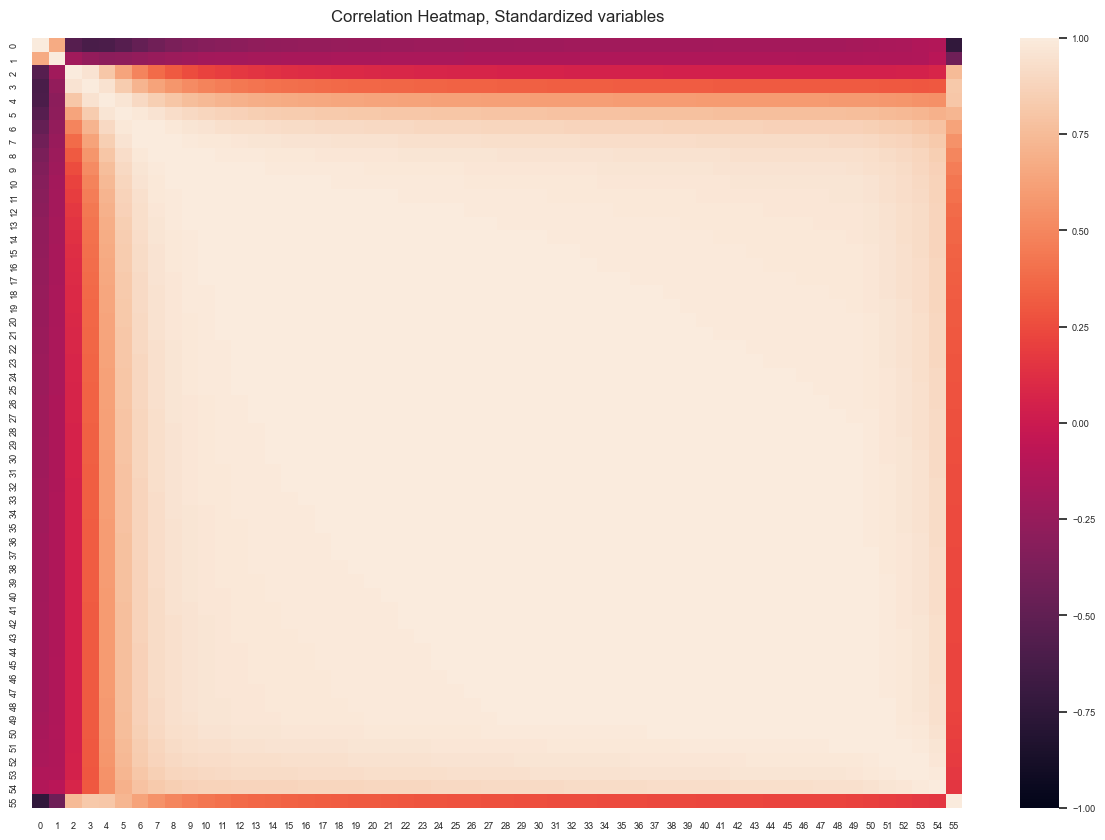

In [14]:
# Correlation map to check for multicollinearity in known dataset

xdata_known_scale = scaler.fit_transform(xdata_known.iloc[:,1:58]) #standardize the data
xdata_known_scale = pd.DataFrame(xdata_known_scale)
plt.figure(figsize=(15, 10))
sns.set(font_scale=0.6)
heatmap=sns.heatmap(xdata_known_scale.corr(),vmin=-1, vmax=1, annot=False, cmap = "rocket")
heatmap.set_title('Correlation Heatmap, Standardized variables', fontdict={'fontsize':12}, pad=12)

# A lot of collinearity. As far as I know there isn't a consensus on whether that impacts ML prediction
# (in fact, most say it does not impact ML predictions, so it's not a problem as it is when trying to estimate
# the statistical significance of each variable individually)
# So let's proceed without removing covariates. 

Text(0.5, 1.0, 'Correlation Heatmap, Standardized variables')

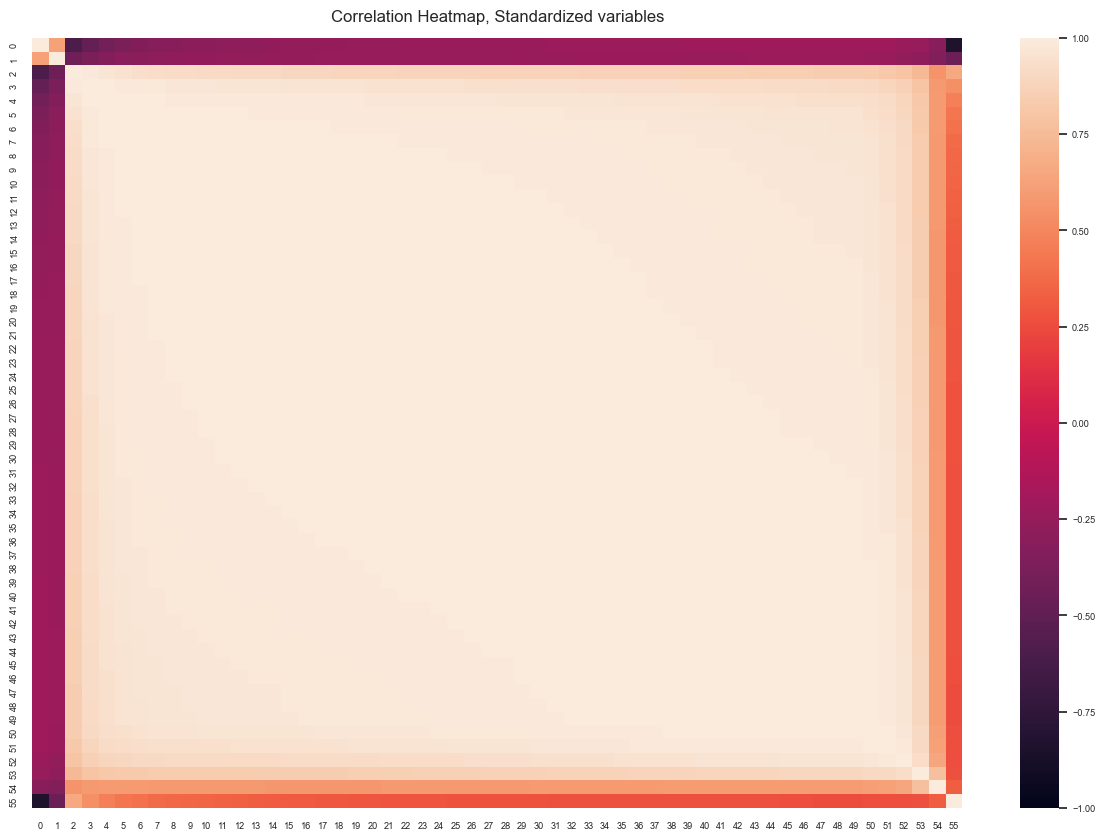

In [15]:
# Correlation map to check for multicollinearity in unknown dataset. Stronger correlation between variables, but very much same pattern.

xdata_unknown_scale = scaler.fit_transform(xdata_unknown) #standardize the data
xdata_unknown_scale = pd.DataFrame(xdata_unknown_scale)
plt.figure(figsize=(15, 10))
sns.set(font_scale=0.6)
heatmap2=sns.heatmap(xdata_unknown_scale.corr(),vmin=-1, vmax=1, annot=False, cmap = "rocket")
heatmap2.set_title('Correlation Heatmap, Standardized variables', fontdict={'fontsize':12}, pad=12)

In [16]:
# Create a data frame with only types
ydata_known = xdata_known["Type"]
ydata_known.head()

0    Epidendrum
1    Epidendrum
2    Epidendrum
3    Dendrobium
4    Dendrobium
Name: Type, dtype: object

In [17]:
# Do a PCA to visualize clusters and outliers

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(xdata_known_scale) # PCA on standardized data
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])
finalDf = pd.concat([principalDf, ydata_known], axis = 1)
finalDf.head()

,PC1,PC2,Type
0,-5.995441,-0.445524,Epidendrum
1,-5.043418,1.831384,Epidendrum
2,-6.281791,-0.976380,Epidendrum
3,-3.287911,0.010935,Dendrobium
4,7.250585,-1.282608,Dendrobium


PC1: 0.8819068998338426, PC2: 0.08002511842216416


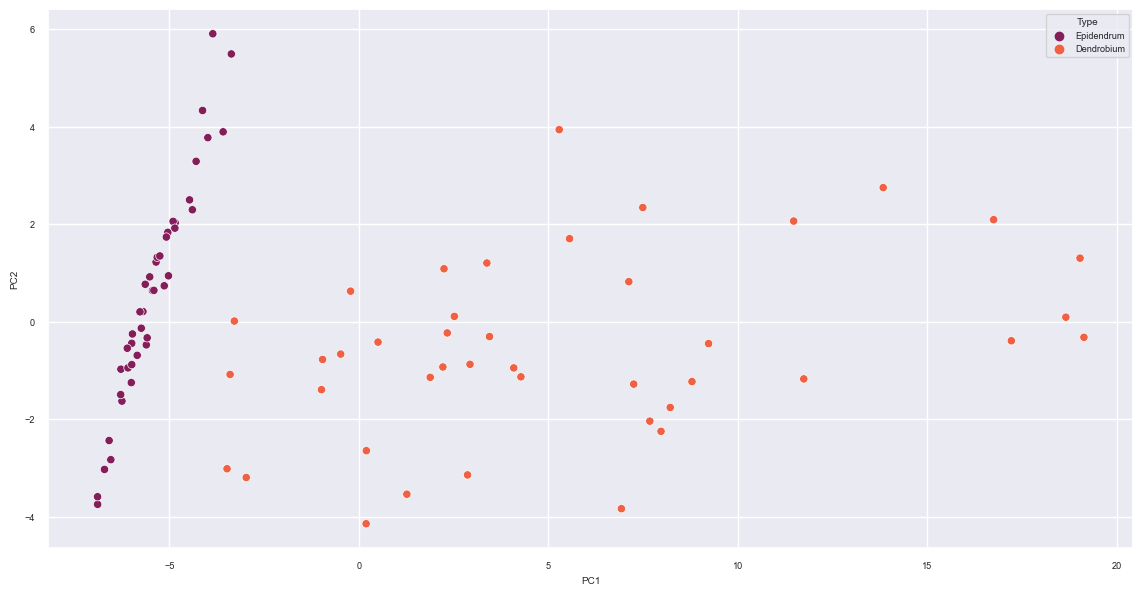

In [18]:
plt.figure(figsize=(14, 7))
fig = sns.scatterplot(data=principalDf, x="PC1", y="PC2", hue = finalDf['Type'], palette = 'rocket')
print("PC1: {}, PC2: {}".format(pca.explained_variance_ratio_[0],pca.explained_variance_ratio_[1]))
# Clear clustering, most variation explained by PC1.
# There seems to be alot of variation within Dendrobium.
# Makes it hard to tell if there are outliers

<AxesSubplot:xlabel='Type', ylabel='PC1'>

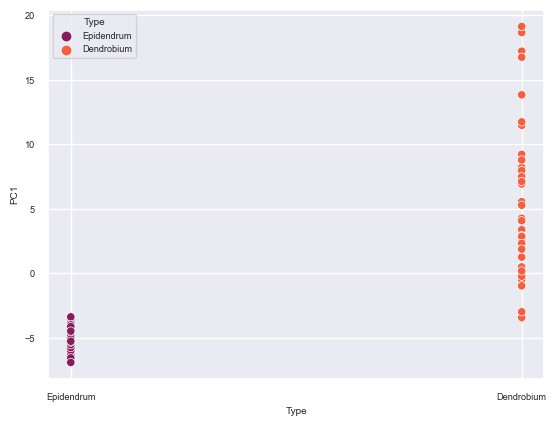

In [19]:
sns.scatterplot(data=finalDf, x="Type", y="PC1", hue = finalDf['Type'], palette = 'rocket')
# Another illustration of variation within types, much higher on Dendrobium

In [20]:
features = list(xdata_known.columns)
features.pop(0)
print(features)
xdata_known_scale.columns = features

['leaflets', 'surface_area', 'measurement_nr1', 'measurement_nr2', 'measurement_nr3', 'measurement_nr4', 'measurement_nr5', 'measurement_nr6', 'measurement_nr7', 'measurement_nr8', 'measurement_nr9', 'measurement_nr10', 'measurement_nr11', 'measurement_nr12', 'measurement_nr13', 'measurement_nr14', 'measurement_nr15', 'measurement_nr16', 'measurement_nr17', 'measurement_nr18', 'measurement_nr19', 'measurement_nr20', 'measurement_nr21', 'measurement_nr22', 'measurement_nr23', 'measurement_nr24', 'measurement_nr25', 'measurement_nr26', 'measurement_nr27', 'measurement_nr28', 'measurement_nr29', 'measurement_nr30', 'measurement_nr31', 'measurement_nr32', 'measurement_nr33', 'measurement_nr34', 'measurement_nr35', 'measurement_nr36', 'measurement_nr37', 'measurement_nr38', 'measurement_nr39', 'measurement_nr40', 'measurement_nr41', 'measurement_nr42', 'measurement_nr43', 'measurement_nr44', 'measurement_nr45', 'measurement_nr46', 'measurement_nr47', 'measurement_nr48', 'measurement_nr49', 

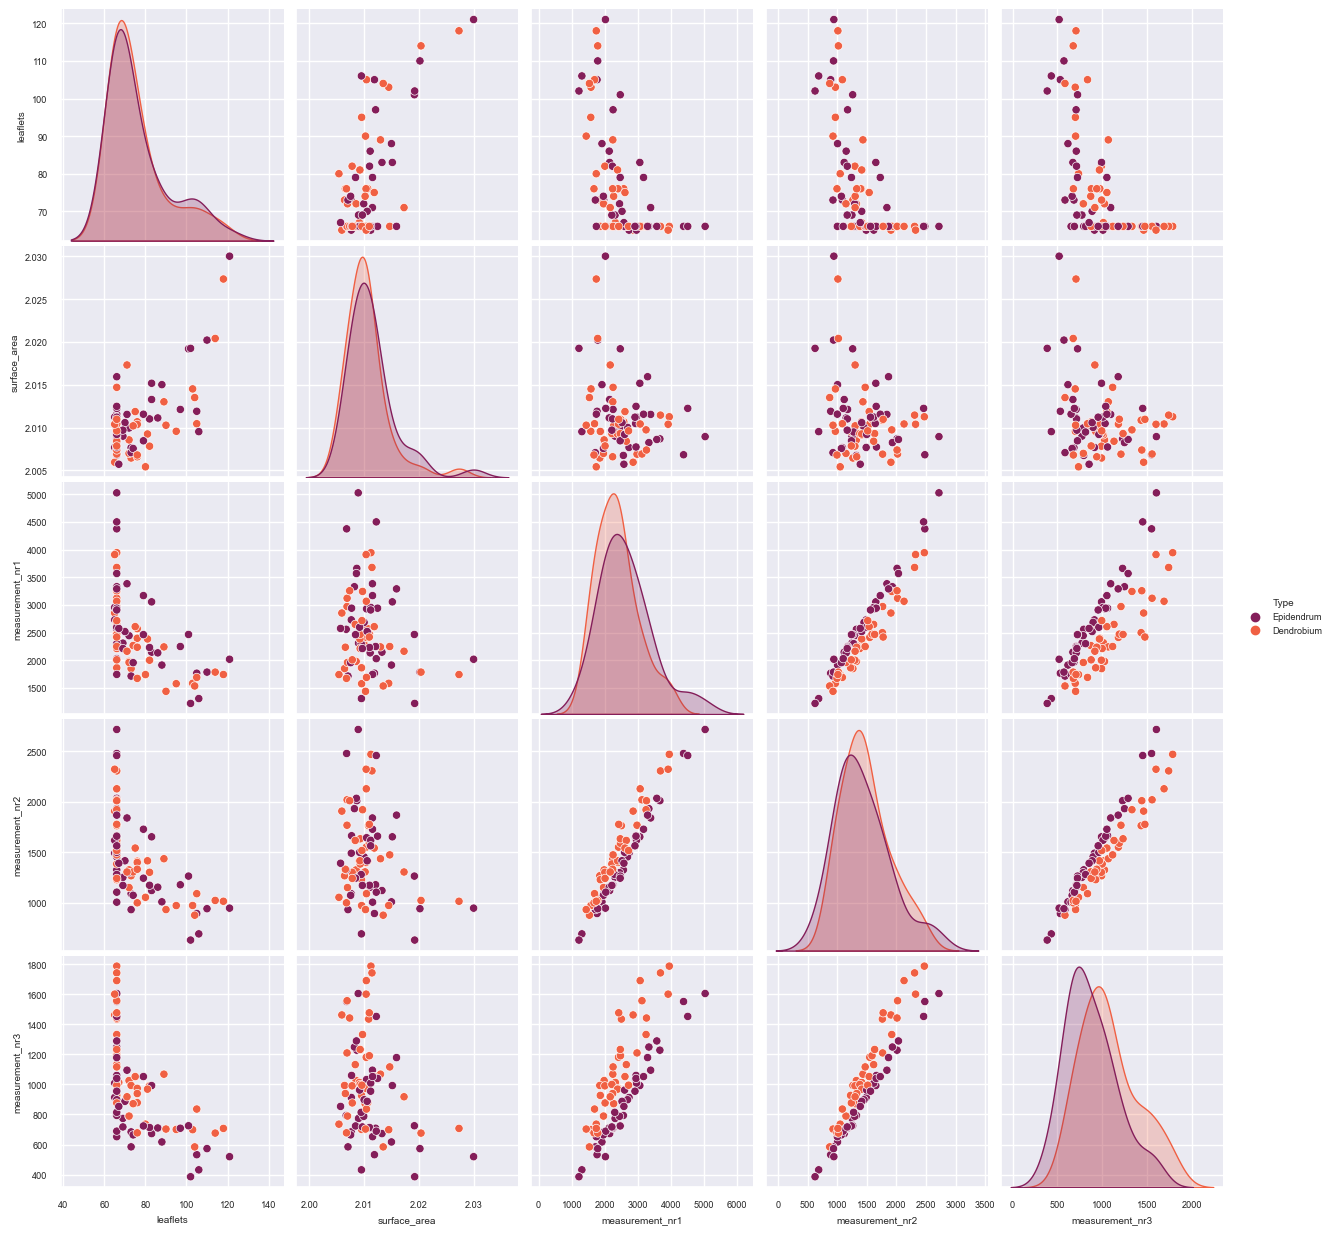

In [21]:
first_five_data = xdata_known.iloc[:, 0:6]
sns.pairplot(first_five_data, hue="Type", palette = 'rocket')
# Good illustration of how some variables correlate. Also, no clustering can be seen with any pair of variables, only after dimensionality reduction.
# As usual with most natural data, there are lots of overlap between both types when we look at any given characteristic, 
# it's only when we summarize many of them together that patterns begin to emerge

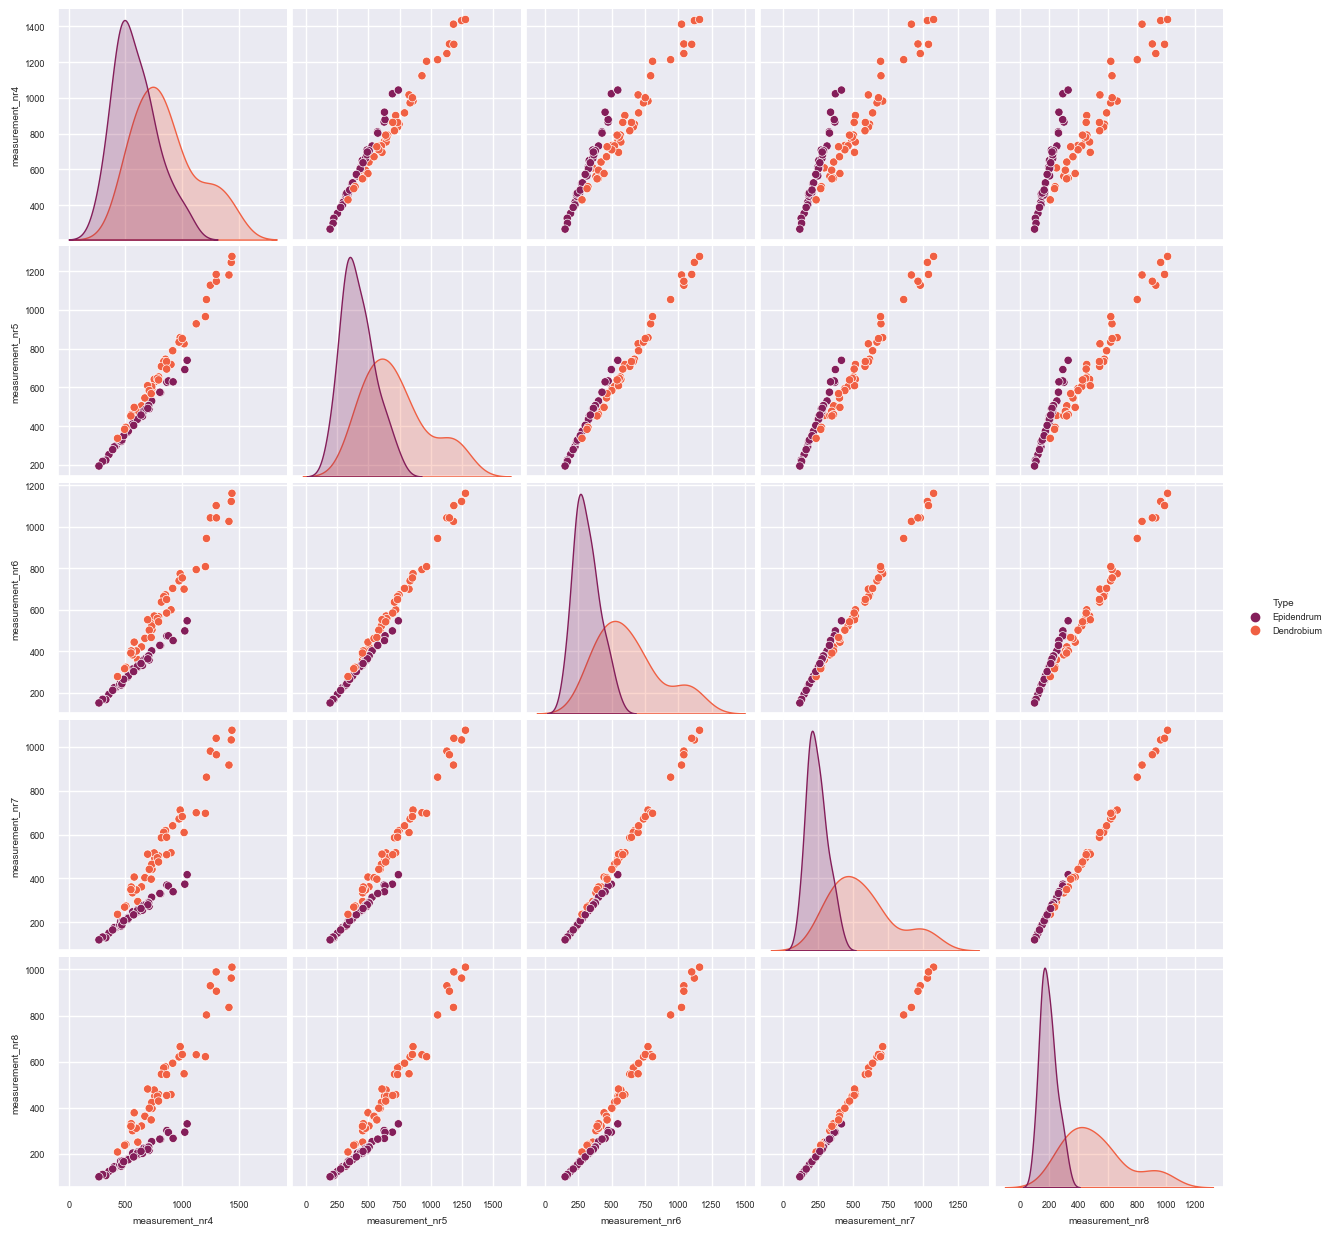

In [22]:
# Same thing for the next 5 variables
next_five_data = xdata_known.iloc[:, 6:11]
next_five_data = pd.concat([next_five_data, ydata_known], axis = 1)
sns.pairplot(next_five_data, hue="Type", palette = 'rocket')

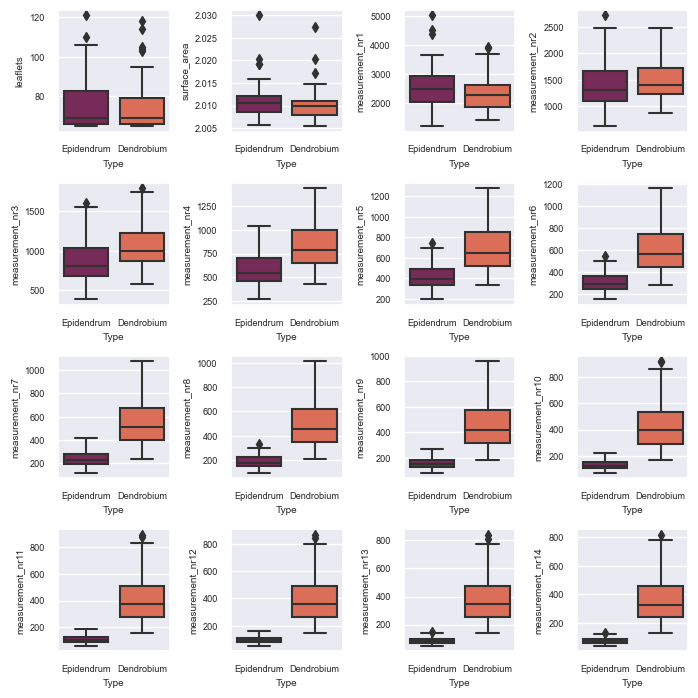

In [23]:
# This gives us a better idea of outliers for each variable
rows = 4
cols = 4
plt.figure(figsize=(7, 7))
for i in range(1,rows*cols+1): 
    plt.subplot(rows,cols,i)
    sns.boxplot(x = xdata_known["Type"], y = xdata_known.iloc[:, i], palette='rocket', orient='v')
    plt.tight_layout()

# Modeling: trying out three ML methods

## K-means clustering (unsupervised ML, exploring whether it can correctly classify the types)

In [24]:
xdata_known_scale.head()

,leaflets,surface_area,measurement_nr1,measurement_nr2,measurement_nr3,measurement_nr4,measurement_nr5,measurement_nr6,measurement_nr7,measurement_nr8,...,measurement_nr45,measurement_nr46,measurement_nr47,measurement_nr48,measurement_nr49,measurement_nr50,measurement_nr51,measurement_nr52,measurement_nr53,measurement_nr54
0,-0.218132,-0.768712,-0.729890,-0.842559,-0.923244,-0.947884,-0.926837,-0.904313,-0.881957,-0.866863,...,-0.825934,-0.824586,-0.825104,-0.820820,-0.815744,-0.832412,-0.803838,-0.868519,-0.832679,-0.450475
1,-0.355383,0.153353,1.216943,0.896402,0.376632,-0.045283,-0.315847,-0.470944,-0.561592,-0.624723,...,-0.782969,-0.775900,-0.773051,-0.772328,-0.766081,-0.716673,-0.684226,-0.621845,-0.446414,-0.306660
2,0.468126,0.567112,-0.483645,-0.770199,-0.960118,-1.014669,-1.001793,-0.975409,-0.945951,-0.920533,...,-0.851273,-0.845970,-0.843775,-0.845072,-0.839940,-0.853859,-0.847257,-0.853247,-0.839927,-0.762923
3,-0.012255,-0.051944,0.100801,-0.097617,-0.308239,-0.414814,-0.454218,-0.466301,-0.467663,-0.467842,...,-0.446076,-0.441435,-0.430476,-0.419932,-0.368255,-0.318686,-0.409880,-0.479944,-0.594204,-0.517667
4,-0.286758,-0.554246,-0.713702,-0.296291,0.158150,0.488922,0.708048,0.838906,0.925527,0.977882,...,1.086968,1.075793,1.079802,1.080937,1.043819,1.038404,0.865068,0.703293,0.613934,-0.462657


In [32]:
# Parameter tuning for the K means model, where we do a parameter sweep of relevant parameters to see which combination makes the model perform best on a known data set.
with warnings.catch_warnings(record=True):
    grid={"n_init":[100,200,300,500], "max_iter":[500,700,900,1100], "algorithm": ["lloyd", "elkan", "auto", "full"], "tol":[1e-6, 1e-5, 1e-4, 1e-3]}
    kmeans=KMeans(n_clusters=2)
    kmeans_cv=GridSearchCV(kmeans,grid)
    kmeans_cv.fit(xdata_known_scale)

print("tuned hpyerparameters :(best parameters) ",kmeans_cv.best_params_)
print(kmeans_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'elkan', 'max_iter': 500, 'n_init': 100, 'tol': 1e-06}
-373.83797962051904


In [25]:
# Modeling with parameters chosen above.
km_model = KMeans(n_clusters=2, n_init=100, max_iter=500, algorithm = 'elkan', tol = 1e-6)
test_km = km_model.fit(xdata_known_scale)
test_km_labels = test_km.labels_
test_km_labels = np.where(test_km_labels == 0, 'Epidendrum', test_km_labels)
test_km_labels = np.where(test_km_labels == '1', 'Dendrobium', test_km_labels)

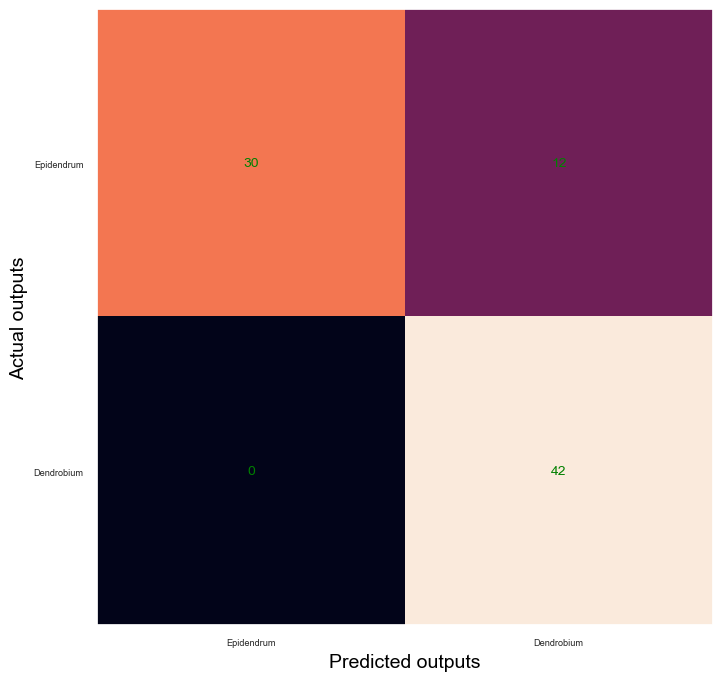

In [26]:
# Confusion matrix
cm = confusion_matrix(ydata_known, test_km_labels)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', color='black', fontsize = '14')
ax.set_ylabel('Actual outputs', color='black', fontsize = '14')
ax.xaxis.set(ticks=range(2))
ax.yaxis.set(ticks=range(2))
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='green', fontsize = '10')
plt.xticks(ticks=[0,1], labels=["Epidendrum", "Dendrobium"])
plt.yticks(ticks=[0,1], labels=["Epidendrum", "Dendrobium"]) 
plt.show()

# Seems like KM has a hard time predicting group membership, perhaps because of large overlap in variables and
# large variability in Dendrobium class?

# Logistic regression (supervised ML)

In [27]:
# Let's first standardize the data 
xdata_known_scale = scaler.fit_transform(xdata_known.iloc[:,1:58]) 
xdata_known_scale = pd.DataFrame(xdata_known_scale)
xdata_unknown_scale = scaler.fit_transform(xdata_unknown)
xdata_unknown_scale = pd.DataFrame(xdata_unknown_scale)

In [28]:
# Create training and testing subsets from total data set
xdata_train, xdata_test, ydata_train, ydata_test = train_test_split(xdata_known_scale, ydata_known, test_size=0.2, random_state=0) 

In [37]:
# Parameter tuning for the logistic regression model, where we do a parameter sweep of relevant parameters to see which combination makes the model perform best on a known data set.

with warnings.catch_warnings(record=True):
    grid={"solver":["newton-cg", "lbfgs", "liblinear", "sag", "saga"], "C":np.logspace(1,5,10), "max_iter":[100,500,1000,1500]}
    logreg=LogisticRegression()
    logreg_cv=GridSearchCV(logreg,grid)
    logreg_cv.fit(xdata_train,ydata_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print(logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 10.0, 'max_iter': 100, 'solver': 'newton-cg'}
0.9857142857142858


[1.0, 1.0]


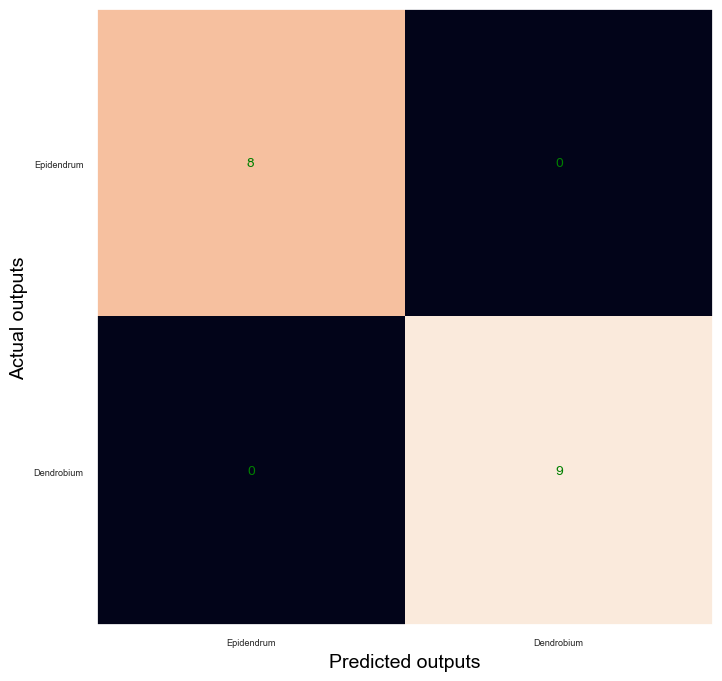

              precision    recall  f1-score   support

  Dendrobium       1.00      1.00      1.00         8
  Epidendrum       1.00      1.00      1.00         9

    accuracy                           1.00        17
   macro avg       1.00      1.00      1.00        17
weighted avg       1.00      1.00      1.00        17



In [29]:
# Train the model with parameters chosen above.
lr_model = LogisticRegression(solver='newton-cg', C=10, max_iter = 100)
lr_model.fit(xdata_train, ydata_train)

# Use test data set to check model accuracy.
ydata_pred = lr_model.predict(xdata_test)
print([lr_model.score(xdata_train, ydata_train), lr_model.score(xdata_test, ydata_test)])

#Confusion matrix
cm = confusion_matrix(ydata_test, ydata_pred)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', color='black', fontsize = '14')
ax.set_ylabel('Actual outputs', color='black', fontsize = '14')
ax.xaxis.set(ticks=range(2))
ax.yaxis.set(ticks=range(2))
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='green', fontsize = '10')
plt.xticks(ticks=[0,1], labels=["Epidendrum", "Dendrobium"])
plt.yticks(ticks=[0,1], labels=["Epidendrum", "Dendrobium"]) 
plt.show()

print(classification_report(ydata_test, ydata_pred))

#### Evaluating how model performs on different training and test subsets

In [30]:
# Loop over different random states to get different sets of training and test data sets, train model and test accuracy. Display precision, recall, F1 score and support.
for x in range(1,6):
    xdata_train, xdata_test, ydata_train, ydata_test = train_test_split(xdata_known_scale, ydata_known, test_size=0.2, random_state=x) 
    lr_model.fit(xdata_train, ydata_train)
    ydata_pred = lr_model.predict(xdata_test)
    mscore1 = lr_model.score(xdata_train, ydata_train)
    mscore2 = lr_model.score(xdata_test, ydata_test)
    classrep = classification_report(ydata_test, ydata_pred)
    print("Training model score is {}, test model score is {}\n Classification report: \n {}".format(mscore1,mscore2,classrep))
    
    # Excellent F1 scores!

Training model score is 1.0, test model score is 1.0
 Classification report: 
               precision    recall  f1-score   support

  Dendrobium       1.00      1.00      1.00         7
  Epidendrum       1.00      1.00      1.00        10

    accuracy                           1.00        17
   macro avg       1.00      1.00      1.00        17
weighted avg       1.00      1.00      1.00        17

Training model score is 1.0, test model score is 1.0
 Classification report: 
               precision    recall  f1-score   support

  Dendrobium       1.00      1.00      1.00         6
  Epidendrum       1.00      1.00      1.00        11

    accuracy                           1.00        17
   macro avg       1.00      1.00      1.00        17
weighted avg       1.00      1.00      1.00        17

Training model score is 1.0, test model score is 1.0
 Classification report: 
               precision    recall  f1-score   support

  Dendrobium       1.00      1.00      1.00         9


## Predict unknown dataset

In [31]:
# Use trained model on unknown data set to predict type of samples 

lr_model = LogisticRegression(solver='newton-cg', C=1.0)
lr_model.fit(xdata_known_scale, ydata_known)
ydata_pred_lr = lr_model.predict(xdata_unknown_scale)
print("Training model score is {}".format(lr_model.score(xdata_known_scale, ydata_known)))
print(ydata_pred_lr)

Training model score is 1.0
['Epidendrum' 'Dendrobium' 'Epidendrum' 'Dendrobium' 'Epidendrum'
 'Epidendrum' 'Epidendrum' 'Epidendrum' 'Epidendrum' 'Epidendrum'
 'Epidendrum' 'Dendrobium' 'Epidendrum' 'Epidendrum' 'Epidendrum'
 'Epidendrum' 'Epidendrum' 'Epidendrum' 'Epidendrum' 'Epidendrum'
 'Dendrobium' 'Dendrobium' 'Epidendrum' 'Dendrobium' 'Epidendrum'
 'Epidendrum' 'Dendrobium' 'Dendrobium' 'Dendrobium' 'Dendrobium'
 'Epidendrum' 'Epidendrum' 'Epidendrum' 'Epidendrum' 'Dendrobium'
 'Epidendrum' 'Epidendrum' 'Dendrobium' 'Epidendrum' 'Dendrobium'
 'Epidendrum' 'Dendrobium' 'Dendrobium' 'Dendrobium' 'Epidendrum'
 'Epidendrum' 'Dendrobium' 'Epidendrum' 'Epidendrum' 'Dendrobium'
 'Dendrobium' 'Dendrobium' 'Dendrobium' 'Dendrobium' 'Epidendrum'
 'Dendrobium' 'Dendrobium' 'Epidendrum' 'Epidendrum' 'Dendrobium'
 'Epidendrum' 'Dendrobium' 'Dendrobium' 'Epidendrum' 'Dendrobium'
 'Dendrobium' 'Epidendrum' 'Dendrobium' 'Dendrobium' 'Dendrobium'
 'Epidendrum' 'Dendrobium' 'Dendrobium' 'Dendrob

In [32]:
# Save output to file named data_unknown_lr_predict.csv
ydata_pred_lr = pd.DataFrame(ydata_pred_lr)
xdata_unknown_new = pd.concat([ydata_pred_lr, xdata_unknown], axis = 1)
xdata_unknown_new = xdata_unknown_new.rename({0: 'Type'}, axis=1)
xdata_unknown_new.to_csv('Documents/Portfolio/Orchids/data_unknown_lr_predict.csv')

## Random forest (more supervised ML)

In [33]:
# Let's first standardize the data (repeating this code here so we can run random forest code without having to run logistic regression code)
xdata_known_scale = scaler.fit_transform(xdata_known.iloc[:,1:58]) 
xdata_known_scale = pd.DataFrame(xdata_known_scale)
xdata_unknown_scale = scaler.fit_transform(xdata_unknown)
xdata_unknown_scale = pd.DataFrame(xdata_unknown_scale)

In [43]:
# I'll use the whole dataset as opposed to PCs because RF is good at handling high dimensional data and outliers
xdata_known_scale.head()

,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,55
0,-0.218132,-0.768712,-0.729890,-0.842559,-0.923244,-0.947884,-0.926837,-0.904313,-0.881957,-0.866863,...,-0.825934,-0.824586,-0.825104,-0.820820,-0.815744,-0.832412,-0.803838,-0.868519,-0.832679,-0.450475
1,-0.355383,0.153353,1.216943,0.896402,0.376632,-0.045283,-0.315847,-0.470944,-0.561592,-0.624723,...,-0.782969,-0.775900,-0.773051,-0.772328,-0.766081,-0.716673,-0.684226,-0.621845,-0.446414,-0.306660
2,0.468126,0.567112,-0.483645,-0.770199,-0.960118,-1.014669,-1.001793,-0.975409,-0.945951,-0.920533,...,-0.851273,-0.845970,-0.843775,-0.845072,-0.839940,-0.853859,-0.847257,-0.853247,-0.839927,-0.762923
3,-0.012255,-0.051944,0.100801,-0.097617,-0.308239,-0.414814,-0.454218,-0.466301,-0.467663,-0.467842,...,-0.446076,-0.441435,-0.430476,-0.419932,-0.368255,-0.318686,-0.409880,-0.479944,-0.594204,-0.517667
4,-0.286758,-0.554246,-0.713702,-0.296291,0.158150,0.488922,0.708048,0.838906,0.925527,0.977882,...,1.086968,1.075793,1.079802,1.080937,1.043819,1.038404,0.865068,0.703293,0.613934,-0.462657


In [34]:
# Create training and testing subsets from total data set
xdata_train, xdata_test, ydata_train, ydata_test = train_test_split(xdata_known_scale, ydata_known, test_size=0.2, random_state=0) 

In [45]:
# Parameter tuning for the random forest model, where we do a parameter sweep of relevant parameters to see which combination makes the model perform best on a known data set.

with warnings.catch_warnings(record=True):
    rfc=RandomForestClassifier()
    param_grid = {'n_estimators': [200, 500],'max_features': ['auto', 'sqrt', 'log2'],'max_depth' : [4,5,6,7,8],'criterion' :['gini', 'entropy']}
    CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
    CV_rfc.fit(xdata_train, ydata_train)
print("tuned hpyerparameters :(best parameters) ",CV_rfc.best_params_)
print(CV_rfc.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 200}
1.0


Accuracy score for Random Forest Model: 1.0


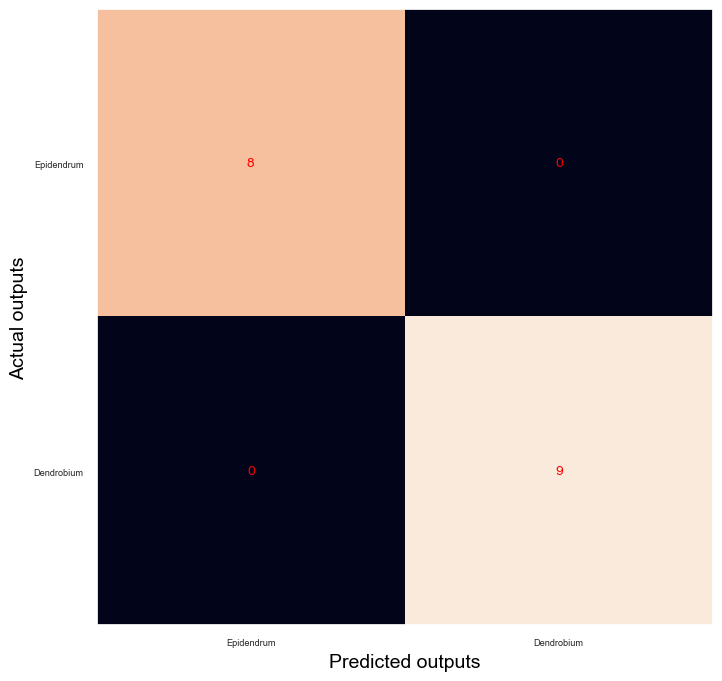

In [35]:
# Train model and test it
xdata_train, xdata_test, ydata_train, ydata_test = train_test_split(xdata_known_scale, ydata_known, test_size=0.2, random_state=0) 
rf_model = RandomForestClassifier(criterion = 'gini', max_depth =  4, max_features = 'auto', n_estimators = 200)
rf_model.fit(xdata_train, ydata_train)
ydata_pred = rf_model.predict(xdata_test)
rf_val_as = accuracy_score(ydata_pred, ydata_test)
print("Accuracy score for Random Forest Model: {}".format(rf_val_as))
# Visualize accuracy with confusion matrix
cm = confusion_matrix(ydata_test, ydata_pred)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', color='black', fontsize = '14')
ax.set_ylabel('Actual outputs', color='black', fontsize = '14')
ax.xaxis.set(ticks=range(2))
ax.yaxis.set(ticks=range(2))
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red', fontsize = '10')
plt.xticks(ticks=[0,1], labels=["Epidendrum", "Dendrobium"])
plt.yticks(ticks=[0,1], labels=["Epidendrum", "Dendrobium"]) 
plt.show()

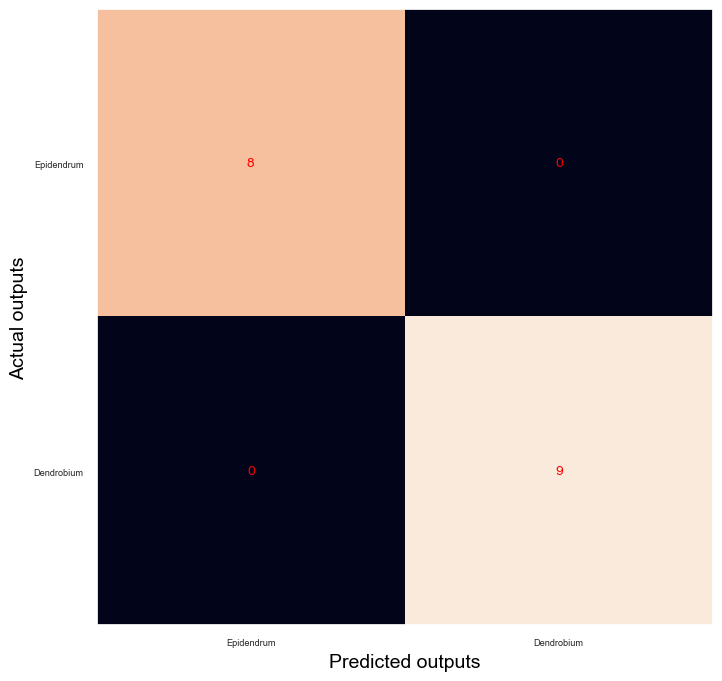

In [36]:
# Visualize accuracy with confusion matrix
cm = confusion_matrix(ydata_test, ydata_pred)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', color='black', fontsize = '14')
ax.set_ylabel('Actual outputs', color='black', fontsize = '14')
ax.xaxis.set(ticks=range(2))
ax.yaxis.set(ticks=range(2))
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red', fontsize = '10')
plt.xticks(ticks=[0,1], labels=["Epidendrum", "Dendrobium"])
plt.yticks(ticks=[0,1], labels=["Epidendrum", "Dendrobium"]) 
plt.show()

#### Evaluate model performance on different subset of training vs test data

In [62]:
for x in range(1,6):
    xdata_train, xdata_test, ydata_train, ydata_test = train_test_split(xdata_known_scale, ydata_known, test_size=0.2, random_state=x) 
    xdata_train_scale = scaler.fit_transform(xdata_train)
    xdata_test_scale = scaler.fit_transform(xdata_test)
    rf_model.fit(xdata_train, ydata_train)
    ydata_pred = rf_model.predict(xdata_test)
    rf_val_as = accuracy_score(ydata_pred, ydata_test)
    classrep = classification_report(ydata_test, ydata_pred)
    print("Accuracy score for Random Forest Model: {:,.0f} \n \n Classification report: \n {}".format(rf_val_as,classrep))
    
    # Excellent F1 scores, even better than logistic regression

Accuracy score for Random Forest Model: 1 
 
 Classification report: 
               precision    recall  f1-score   support

  Dendrobium       1.00      1.00      1.00         7
  Epidendrum       1.00      1.00      1.00        10

    accuracy                           1.00        17
   macro avg       1.00      1.00      1.00        17
weighted avg       1.00      1.00      1.00        17

Accuracy score for Random Forest Model: 1 
 
 Classification report: 
               precision    recall  f1-score   support

  Dendrobium       1.00      1.00      1.00         6
  Epidendrum       1.00      1.00      1.00        11

    accuracy                           1.00        17
   macro avg       1.00      1.00      1.00        17
weighted avg       1.00      1.00      1.00        17

Accuracy score for Random Forest Model: 1 
 
 Classification report: 
               precision    recall  f1-score   support

  Dendrobium       1.00      1.00      1.00         9
  Epidendrum       1.00 

### Predict unknown dataset

In [55]:
rf_model.fit(xdata_known_scale, ydata_known)
ydata_pred_rf = rf_model.predict(xdata_unknown_scale)
print(ydata_pred_rf)

['Epidendrum' 'Dendrobium' 'Epidendrum' 'Dendrobium' 'Epidendrum'
 'Epidendrum' 'Epidendrum' 'Epidendrum' 'Epidendrum' 'Epidendrum'
 'Epidendrum' 'Dendrobium' 'Epidendrum' 'Epidendrum' 'Epidendrum'
 'Epidendrum' 'Epidendrum' 'Epidendrum' 'Epidendrum' 'Epidendrum'
 'Dendrobium' 'Dendrobium' 'Epidendrum' 'Dendrobium' 'Epidendrum'
 'Epidendrum' 'Dendrobium' 'Dendrobium' 'Dendrobium' 'Dendrobium'
 'Epidendrum' 'Epidendrum' 'Epidendrum' 'Epidendrum' 'Dendrobium'
 'Epidendrum' 'Epidendrum' 'Dendrobium' 'Epidendrum' 'Dendrobium'
 'Epidendrum' 'Dendrobium' 'Dendrobium' 'Dendrobium' 'Epidendrum'
 'Epidendrum' 'Dendrobium' 'Epidendrum' 'Epidendrum' 'Dendrobium'
 'Dendrobium' 'Dendrobium' 'Dendrobium' 'Dendrobium' 'Epidendrum'
 'Dendrobium' 'Dendrobium' 'Epidendrum' 'Epidendrum' 'Dendrobium'
 'Epidendrum' 'Dendrobium' 'Dendrobium' 'Epidendrum' 'Dendrobium'
 'Dendrobium' 'Epidendrum' 'Dendrobium' 'Dendrobium' 'Dendrobium'
 'Epidendrum' 'Dendrobium' 'Dendrobium' 'Dendrobium' 'Epidendrum'
 'Dendrobi

In [56]:
# Are the predictions from both models equal? Yes - perfect consilience of methods between logistic regression and random forest.
ydata_pred_lr = lr_model.predict(xdata_unknown_scale)
ydata_pred_rf == ydata_pred_lr

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

## Permutation importance

In [40]:
result = permutation_importance(rf_model, xdata_train, ydata_train, n_repeats=10, random_state=0)
perm_sorted_idx = result.importances_mean.argsort()

tree_importance_sorted_idx = np.argsort(rf_model.feature_importances_)
tree_indices = np.arange(0, len(rf_model.feature_importances_)) + 0.5

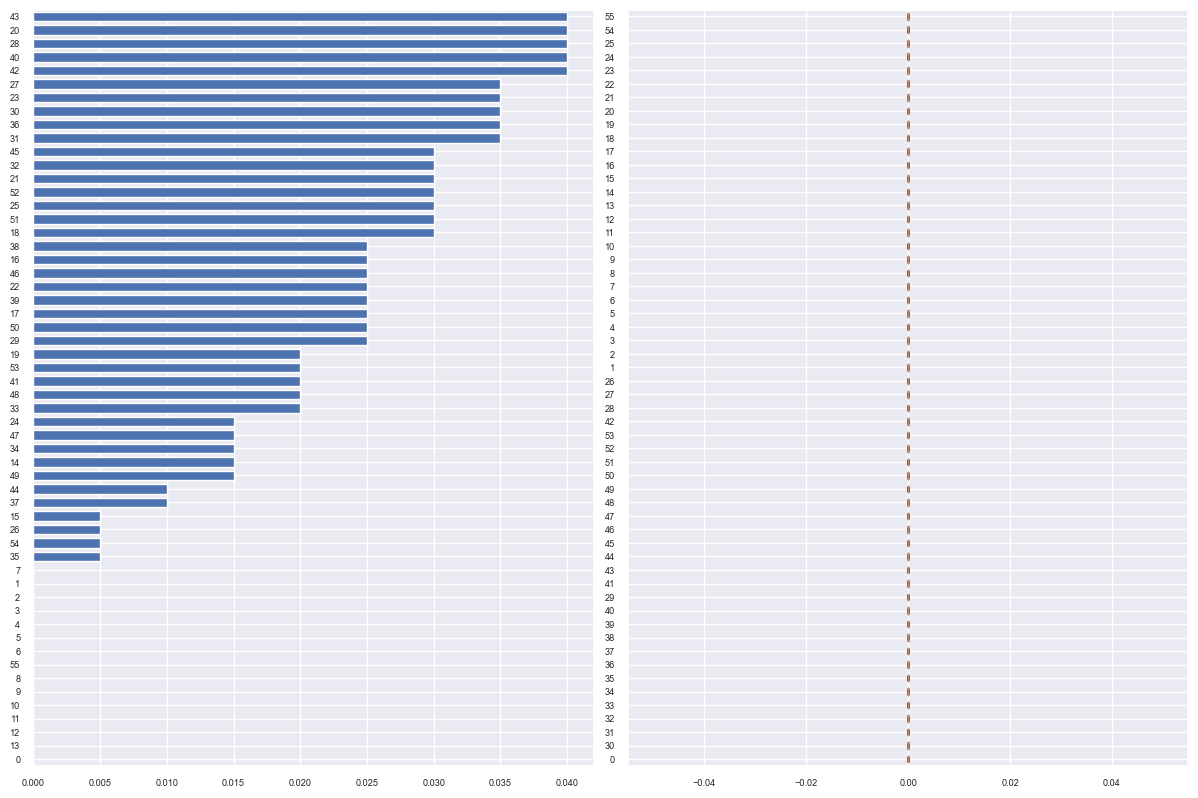

In [41]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
ax1.barh(tree_indices, rf_model.feature_importances_[tree_importance_sorted_idx], height=0.7)
ax1.set_yticks(tree_indices)
ax1.set_yticklabels(xdata_known_scale.columns[tree_importance_sorted_idx])
ax1.set_ylim((0, len(rf_model.feature_importances_)))
ax2.boxplot(
    result.importances[perm_sorted_idx].T,
    vert=False,
    labels=xdata_known_scale.columns[perm_sorted_idx],
)
fig.tight_layout()
plt.show()
#The permutation importance plot shows that permuting a feature does not drop test accuracy at all, which would suggest that none of the features are important. 
#This contradicts the high test accuracy above, which means at least some feature must be important. 
#The permutation importance is calculated on the training set to show how much the model relies on each feature during training.

### Hierarchical clustering

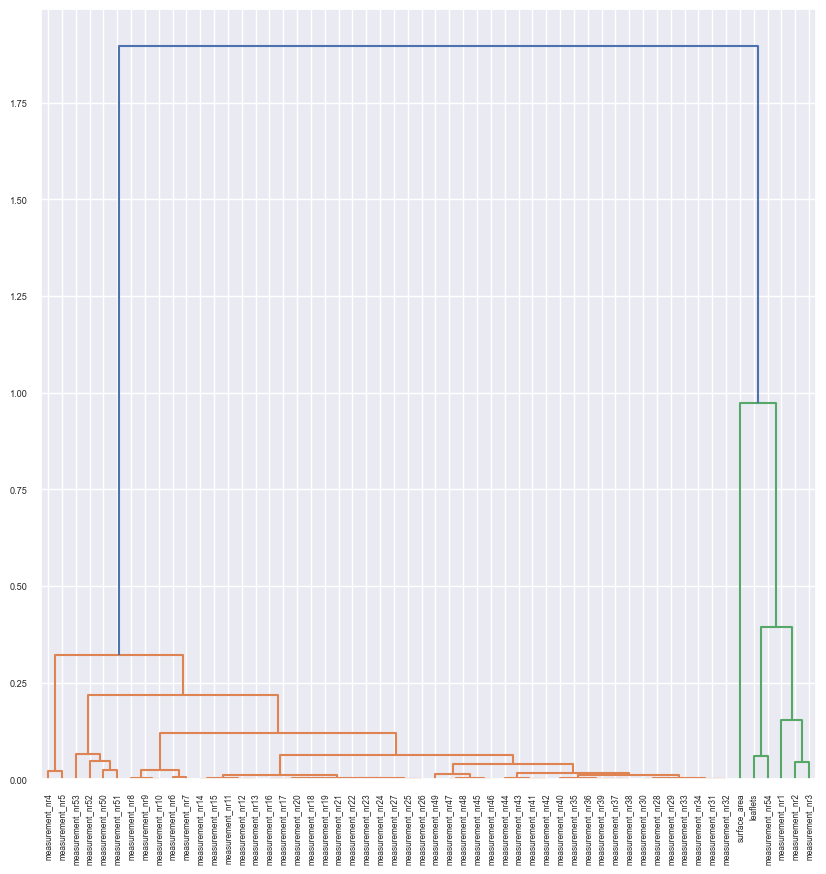

In [42]:
# Since we have high multicollinearity, we can perform hierarchical clustering on the Spearman rank-order correlations, pick a threshold, and keep a single feature from each cluster.

corr = spearmanr(xdata_known_scale).correlation
# Correlation matrix must be symmetric
corr = (corr + corr.T) / 2
np.fill_diagonal(corr, 1)
# We convert the correlation matrix to a distance matrix before performing
# hierarchical clustering using Ward's linkage.
plt.figure(figsize=(10, 10))
distance_matrix = 1 - np.abs(corr)
dist_linkage = hierarchy.ward(squareform(distance_matrix))
dendro = hierarchy.dendrogram(
    dist_linkage, labels=xdata_known.iloc[:, 1:58].columns.values.tolist(), leaf_rotation=90
)
dendro_idx = np.arange(0, len(dendro["ivl"]))

In [65]:
cluster_ids = hierarchy.fcluster(dist_linkage, 1, criterion="distance")
cluster_id_to_feature_ids = defaultdict(list)
for idx, cluster_id in enumerate(cluster_ids):
    cluster_id_to_feature_ids[cluster_id].append(idx)
selected_features = [v[0] for v in cluster_id_to_feature_ids.values()]

xdata_train_sel = xdata_train.iloc[:,selected_features]
xdata_test_sel = xdata_test.iloc[:,selected_features]

rf_model.fit(xdata_train_sel, ydata_train)
print(
    "Accuracy on test data with features removed: {:.2f}".format(
        rf_model.score(xdata_test_sel, ydata_test)
    )
)
# I picked a threshold by visual inspection of the dendrogram to group our features into clusters. Then I chose a feature from each cluster to keep, selected those features from the dataset, and trained a new random forest. 
# The test accuracy of the new random forest dropped when compared to the random forest trained on the complete dataset.

Accuracy on test data with features removed: 0.94


### PCA on predicted data. Does the clustering pattern remain?

In [66]:
# PCA for visualizing clusters on predicted data set. 
ydata_pred_rf_pd = pd.DataFrame(ydata_pred_rf)
xdata_new_scale = scaler.fit_transform(xdata_unknown)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(xdata_new_scale) # PCA on standardized data
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])
finalDf = pd.concat([principalDf, ydata_pred_rf_pd], axis = 1)
finalDf = finalDf.rename({0: 'Type'}, axis=1)
finalDf.head()

,PC1,PC2,Type
0,-5.977289,-0.335918,Epidendrum
1,0.220480,-0.033359,Dendrobium
2,-5.852695,-0.481080,Epidendrum
3,4.102534,-1.697968,Dendrobium
4,-5.635734,-0.793334,Epidendrum


PC1: 0.9182287973616954, PC2: 0.04386091748616563


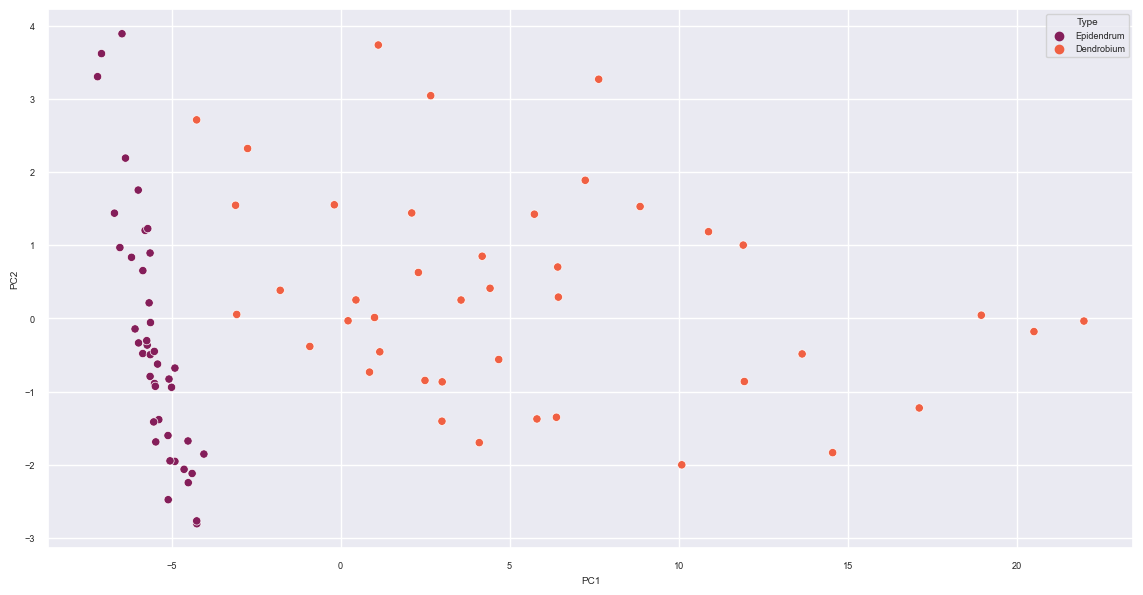

In [67]:
# Same pattern on PC1 and PC2 remains, which is good news.
plt.figure(figsize=(14, 7))
fig = sns.scatterplot(data=principalDf, x="PC1", y="PC2", hue = finalDf['Type'], palette = 'rocket')
print("PC1: {}, PC2: {}".format(pca.explained_variance_ratio_[0],pca.explained_variance_ratio_[1]))
# Pattern remains, PC1 still separates types well

<AxesSubplot:xlabel='Type', ylabel='PC1'>

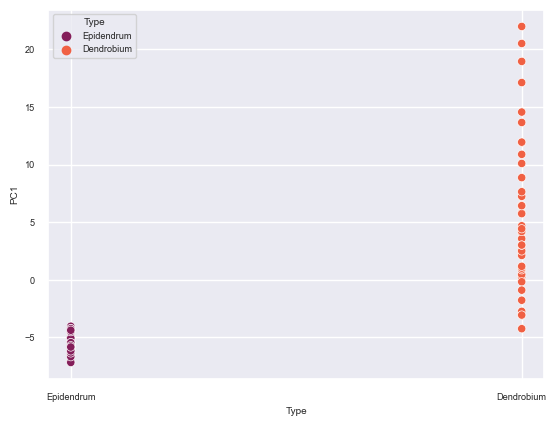

In [68]:
# Similar variation to the known dataset for both species on PC1
sns.scatterplot(data=finalDf, x="Type", y="PC1", hue = finalDf['Type'], palette = 'rocket')

## Append predicted types to unknown dataset

In [69]:
ydata_pred_rf = pd.DataFrame(ydata_pred_rf)
xdata_unknown_new_2 = pd.concat([ydata_pred_rf, xdata_unknown], axis = 1)
xdata_unknown_new_2 = xdata_unknown_new_2.rename({0: 'Type'}, axis=1)
xdata_unknown_new_2.to_csv('Documents/Portfolio/Orchids/data_unknown_rf_predict.csv')

# Are we correct??

**We want to know whether we are correct or not. Lucky us, we have information about the actual classification of each sample in our xdata_unknown file.**

In [70]:
types_unknown = pd.read_csv('Documents/Portfolio/Orchids/types_unknown.csv') 

In [71]:
ydata_pred_rf.rename(columns = {0:'Type'}, inplace = True)

In [72]:
types_unknown.compare(ydata_pred_rf)
# The two dataframes are identical (hence no output)

Empty DataFrame
Columns: []
Index: []